In [205]:
import numpy as np
def softmax(z):
    """
    Compute the softmax of a 2D numpy array along the specified axis.
    Parameters:
    z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples

    and n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
    each row sums to 1 and represents the probability distribution
    over classes for a sample.

    Notes:
    - Applies a normalization trick to prevent numerical instability by subtracting
    the max value in each row before exponentiation.
    """
# Normalize input to prevent numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [206]:
def test_softmax():
    """
    Perform basic assertion tests on the softmax function to validate its correctness.
    Tests:
    - Ensure that the output probabilities sum to 1 for each row.
    - Ensure non-negative values (all probabilities should be >= 0).
    - Test on edge cases (e.g., all zeros, very large or small values).
    """
# Test input
    test_cases = [
    (np.array([[0, 0, 0]]), "All zeros"),
    (np.array([[1, 2, 3]]), "Simple case"),
    (np.array([[1000, 1000, 1000]]), "Large identical values"),
    (np.array([[-1000, -1000, -1000]]), "Small identical values"),
    (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]
    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)
    # Check that probabilities sum to 1
        assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description
    }"
    # Check non-negativity
        assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"
        print("Passed.")
    print("All tests passed for softmax function.")
test_softmax()



Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


In [207]:
# Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.
    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,).
    Returns:
    float: Cross-entropy loss for the observation.
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10)) # Add epsilon to prevent log(0)

In [208]:
def test_loss_softmax():
    """
    Test the loss_softmax function using a known input and output.
    """
# Test Case 1: Perfect prediction
    y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
    y_pred = np.array([0.1, 0.8, 0.1]) # Predicted probabilities
    expected_loss = -np.log(0.8) # Expected loss for perfect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"
# Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0]) # True label (one-hot encoded)
    y_pred = np.array([0.3, 0.4, 0.3]) # Predicted probabilities
    expected_loss = -np.log(0.3) # Expected loss for incorrect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"
# Test Case 3: Edge case with near-zero probability
    y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
    y_pred = np.array([0.01, 0.98, 0.01]) # Predicted probabilities
    expected_loss = -np.log(0.98) # Expected loss for edge case
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"
    print("All test cases passed!")
# Run the test
test_loss_softmax()

All test cases passed!


In [209]:
#Cost Function for Softmax (Average Loss)
def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    float: Average cross-entropy cost over all samples.
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [210]:
def test_cost_softmax():
    """
    Test the cost_softmax function using a known input and output.
    """
    # Test Case 1: Small dataset with perfect predictions
    X = np.array([[1, 2], [2, 3], [3, 4]]) # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
    W = np.array([[1, -1], [-1, 1]]) # Weight matrix (d=2, c=2)
    b = np.array([0, 0]) # Bias vector (c=2)
    z = np.dot(X, W) + b
    y_pred = softmax(z) # Predicted probabilities
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"
    # Test Case 2: All-zero weights and bias
    X = np.array([[1, 0], [0, 1], [1, 1]]) # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
    W = np.zeros((2, 2)) # Zero weight matrix
    b = np.zeros(2) # Zero bias vector
    z = np.dot(X, W) + b
    y_pred = softmax(z) # Predicted probabilities (uniform distribution)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"
    print("All test cases passed!")
    # Run the test
test_cost_softmax()

All test cases passed!


In [211]:
#Gradient Calculation
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b

In [212]:
# Test function
def test_compute_gradient_softmax():
    # Define simple inputs
    X = np.array([[1, 2], [3, 4]]) # Shape (2, 2)
    y = np.array([[1, 0], [0, 1]]) # Shape (2, 2), one-hot encoded
    W = np.array([[0.1, 0.2], [0.3, 0.4]]) # Shape (2, 2)
    b = np.array([0.01, 0.02]) # Shape (2,)
    # Expected gradients (calculated manually or using a reference implementation)
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]
    # Compute gradients using the function
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    # Assertions
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"
    print("All tests passed for compute_gradient_softmax!")
    # Run the test
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


In [213]:
# Gradient Descent
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.
    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
         print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history

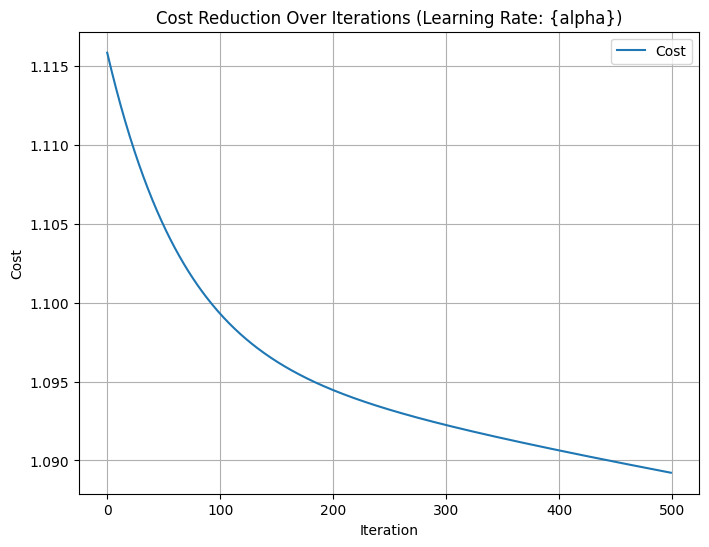

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [214]:
# To test a Gradient Descent we plot the Cost vs. Iterations and observe the behaviour and flow of theplot.
import matplotlib.pyplot as plt
def test_gradient_descent_softmax_with_plot():
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 100, 5, 3 # 100 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1 # One-hot encoding
    # Initialize weights and biases
    W = np.random.rand(d, c)
    b = np.random.rand(c)
    # Parameters for gradient descent
    alpha = 0.01 # Learning rate
    n_iter = 500 # Number of iterations
    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)
    # Plot the cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Iterations (Learning Rate: {alpha})")
    plt.legend()
    plt.grid()
    plt.show()
    # Final cost should ideally be less than initial cost
    print(f"Initial Cost: {cost_history[0]}")
    print(f"Final Cost: {cost_history[-1]}")
test_gradient_descent_softmax_with_plot()

In [215]:
# Prediction Function
def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

In [216]:
def test_predict_softmax():
# Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 10, 5, 3 # 10 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)
    # Compute the predictions using the function
    predictions = predict_softmax(X, W, b)
    # Check the shape of the output
    assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"
    # Verify that all predicted labels are within the range of class indices
    assert np.all(predictions >= 0) and np.all(predictions < c), (
    f"Predictions out of range: expected 0 to {c-1}, got {predictions}"
    )
    # Check that the predicted labels are integers
    assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.
    dtype}"
    print("All tests passed for predict_softmax!")
# Run the test
test_predict_softmax()

All tests passed for predict_softmax!


In [217]:
# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,).
    y_pred (numpy.ndarray): Predicted class labels of shape (n,).
    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score.
    """
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1

In [218]:
#Putting helper functions to actions- Softmax Regression for the dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv(r"C:\Users\Asus\Desktop\ML_Herald\Repository\5CS037-2024-Rohit\Worksheets\Datasets\Titanic-Dataset.csv")

# Display information about the dataset before cleaning
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [220]:
print("\nDataset Description Before Cleaning:")
df.describe()


Dataset Description Before Cleaning:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
print(f"The number of unique values in Pclass column are: {df['Pclass'].nunique()}")
print(f"\nRandom 10 values are: {df['Pclass'].sample(n = 10)}")

      

The number of unique values in Pclass column are: 3

Random 10 values are: 251    3
75     3
335    3
658    2
886    2
1      1
240    3
721    3
27     1
489    3
Name: Pclass, dtype: int64


In [223]:
X = df[['Survived', 'Age', 'Parch', 'SibSp', 'Sex', 'Embarked']] # Creates a feature matrix
y = df[['Pclass']] # Creates a Target

In [224]:
#One-hot encode categorical variables manually
sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

#Normalize numerical features manually
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
numerical_data = df[numerical_features]
numerical_data_normalized = (numerical_data - numerical_data.mean()) / numerical_data.std()

#Combine all processed features
X = pd.concat([numerical_data_normalized, sex_encoded, embarked_encoded], axis=1).values
y = df['Pclass'].values

#Convert 'y' to one-hot encoding
num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y - 1]

In [225]:
X[0:5]

array([[-0.5654188991856514, -0.5021631365156053, 0.4325504280418025,
        -0.4734077245683898, False, True, False, False, True],
       [0.663488390424261, 0.7864036178345383, 0.4325504280418025,
        -0.4734077245683898, True, False, True, False, False],
       [-0.25819207678317324, -0.48857985158126105, -0.4742788222764234,
        -0.4734077245683898, True, False, False, False, True],
       [0.4330682736224024, 0.4204940697654092, 0.4325504280418025,
        -0.4734077245683898, True, False, False, False, True],
       [0.4330682736224024, -0.48606442844527137, -0.4742788222764234,
        -0.4734077245683898, False, True, False, False, True]],
      dtype=object)

In [226]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=
y_one_hot)
X_train = np.array(X_train, dtype = float)
X_test = np.array(X_test, dtype = float)
y_train = np.array(y_train, dtype = float)
y_test = np.array(y_test, dtype = float)
# Initialize the scaler and scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # Assertions to check the shape of X_train_scaled and X_test_scaled
# assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {
# X_train_scaled.shape}"
# assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {
# X_test_scaled.shape}"
# print("Shape assertions passed!")


Training Softmax Regression Model:
Iteration 0: Cost = 1.067811
Iteration 100: Cost = 0.679791
Iteration 200: Cost = 0.626604
Iteration 300: Cost = 0.600053
Iteration 400: Cost = 0.583531
Iteration 500: Cost = 0.571999
Iteration 600: Cost = 0.563364
Iteration 700: Cost = 0.556588
Iteration 800: Cost = 0.551094
Iteration 900: Cost = 0.546532
Iteration 999: Cost = 0.542710


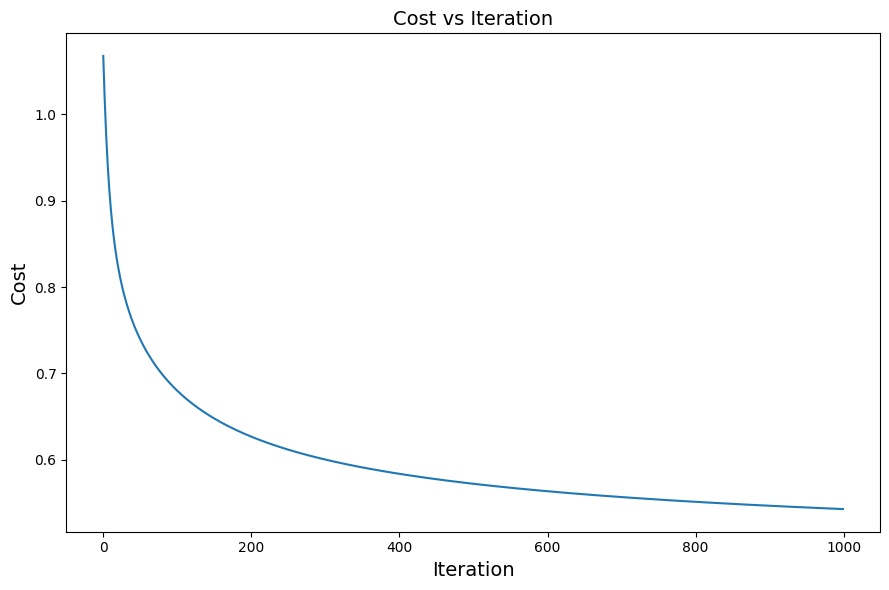

In [227]:
# Intitalizations:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000
print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(np.array(X_train, dtype=float), np.array(y_train, dtype=float), W, b, alpha, n_iter, show_cost=True)
#Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()


In [228]:
# Test model
y_train_pred = predict_softmax(np.array(X_train, dtype = float), W, b)
y_test_pred = predict_softmax(X_test, W, b)
# Evaluate train and test performance
train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.5427
Test Loss (Cost): 0.5255


In [229]:
# Accuracy on test data
y_test_true = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation

cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Test Accuracy: 79.33%

Confusion Matrix:
[[42  0  1]
 [ 4  4 29]
 [ 2  1 96]]
Precision: 0.80
Recall: 0.79
F1-Score: 0.73


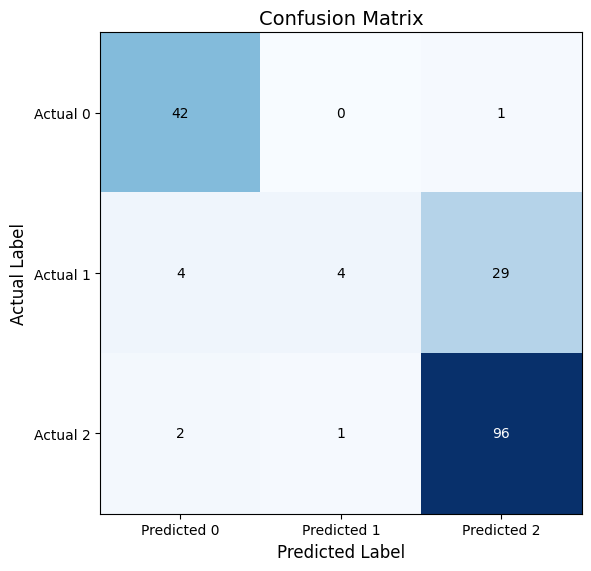

In [230]:
#Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap="Blues") # Use a color map for better visualization
# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(["Predicted 0", "Predicted 1", "Predicted 2"])
ax.set_yticklabels(["Actual 0", "Actual 1", "Actual 2"])
# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > np.max(cm) / 2 else
"black")

# Add grid lines and axis labels
ax.grid(False)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.tight_layout()
plt.show()